# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

We'll review Nobel laureate data to see what patterns and relationships we can find

### Import Statements

In [91]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [92]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [93]:
df_data = pd.read_csv('data/nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with a mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

### Data Overview

In [94]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


### Checking data types

In [95]:
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

### Summary overview of data

In [96]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


### Further Review: 

* Are there any duplicate values in the dataset?
* Are there any NaN values in the dataset?

### Check for Duplicates

In [97]:
df_data.duplicated().values.sum()

0

### Check for NaN Values

In [98]:
df_data.isna().values.sum()

1023

In [99]:
columns_list = ['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO']

### Finding where the NaN values are at

In [100]:
for column in columns_list:
    print(f'In column {column}, there are {df_data[column].isna().values.sum()} NaN values')

In column year, there are 0 NaN values
In column category, there are 0 NaN values
In column prize, there are 0 NaN values
In column motivation, there are 88 NaN values
In column prize_share, there are 0 NaN values
In column laureate_type, there are 0 NaN values
In column full_name, there are 0 NaN values
In column birth_date, there are 28 NaN values
In column birth_city, there are 31 NaN values
In column birth_country, there are 28 NaN values
In column birth_country_current, there are 28 NaN values
In column sex, there are 28 NaN values
In column organization_name, there are 255 NaN values
In column organization_city, there are 255 NaN values
In column organization_country, there are 254 NaN values
In column ISO, there are 28 NaN values


### Another method

In [101]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

* Converting the `birth_date` column to Pandas `Datetime` objects
* Adding a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Converting Year and Birth Date to Datetime

In [102]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])

#### Adding a Column with the Prize Share as a Percentage

In [103]:
share_pct = []
for x in df_data['prize_share']:
    x = x.replace('/', '')
    x = int(x[0]) / int(x[1])
    share_pct.append(x)

In [104]:
df_data['share_pct'] = share_pct
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25


### Checking data

In [105]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

Creating a donut chart using plotly which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [106]:
gender_df = df_data['sex'].value_counts()
gender_df

Male      876
Female     58
Name: sex, dtype: int64

### Plotly Donut Chart

In [107]:
fig = px.pie(labels=gender_df.index,
             values=gender_df.values,
             title="Gender of Nobel Laureates",
             names=gender_df.index,
             hole=0.6
            )
fig.update_traces(textposition='inside',
                  textinfo='percent',
                  textfont_size=15
                 )
fig.show()

C:\Users\armed\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What is their `birth_country`? Were they part of an organization?

### Checking for the first 3 female Nobel laureates

In [108]:
df_data[df_data['sex'] =='Female'][:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Finding the Repeat Winners

Checking for Nobel laureates that won more than a single time 

In [109]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


In [110]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

* In how many categories are prizes awarded? 
* Creating a plotly bar chart with the number of prizes awarded by category
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

### Getting prize totals per category

In [111]:
df_categories = df_data['category'].value_counts()
df_categories

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

### Plotly Bar Chart

In [112]:
bar = px.bar(x = df_categories.index,
             y = df_categories.values,
             title='Nobel Prize Awards Per Category',
             hover_name=df_categories.index,
             color=df_categories.values,
             color_continuous_scale='Aggrnyl')
 

bar.update_layout(xaxis_title='Category',
yaxis_title='Number of Awards Given',
coloraxis_showscale=False)

bar.show()

### Further Review

* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [113]:
df_data[df_data['category'] =='Economics'].head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Male and Female Winners by Category

Creating a plotly bar chart that shows the split between men and women by category.
* How many prizes went to women in Literature compared to Physics?

In [114]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [115]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()


# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created? Looking at the trend in awards visually. 
* Counting the number of prizes awarded every year
* Creating a 5 year rolling average of the number of prizes
* Superimposing the rolling average on a scatter plot with Matplotlib
* Setting a tick mark on the x-axis for every 5 years from 1900 to 2020 
* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?

### Counting the number of prizes per year

In [116]:
df_data['year'].value_counts()

2001    15
2019    14
1996    13
2018    13
2000    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: year, Length: 117, dtype: int64

### Creating a 5 year rolling average of the number of prizes

In [117]:
df_year_rolling = df_data['year'].value_counts().rolling(window=5).mean()
df_year_rolling

2001     NaN
2019     NaN
1996     NaN
2018     NaN
2000   13.60
        ... 
1915    4.00
1924    3.80
1914    3.60
1918    3.20
1916    2.60
Name: year, Length: 117, dtype: float64

In [118]:
prize_per_year = df_data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [119]:
moving_average = prize_per_year.rolling(window=5).mean()

### Plotly Scatterplot

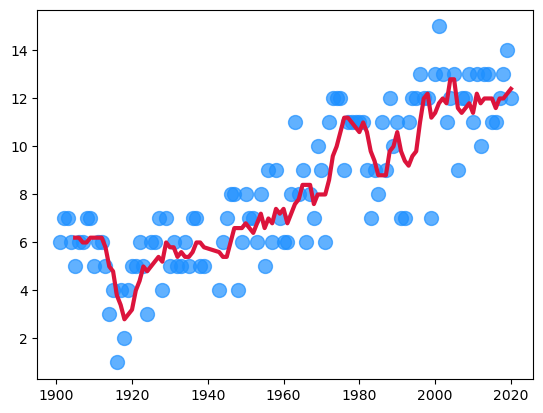

In [120]:
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

plt.show()

In [121]:
# Just testing here. Nothing relevant
df_data.groupby(by='sex').count().prize

sex
Female     58
Male      876
Name: prize, dtype: int64

### Numpy array for xticks

In [122]:
np.arange(1900, 2021, step=5)

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

### Matplotlib Chart

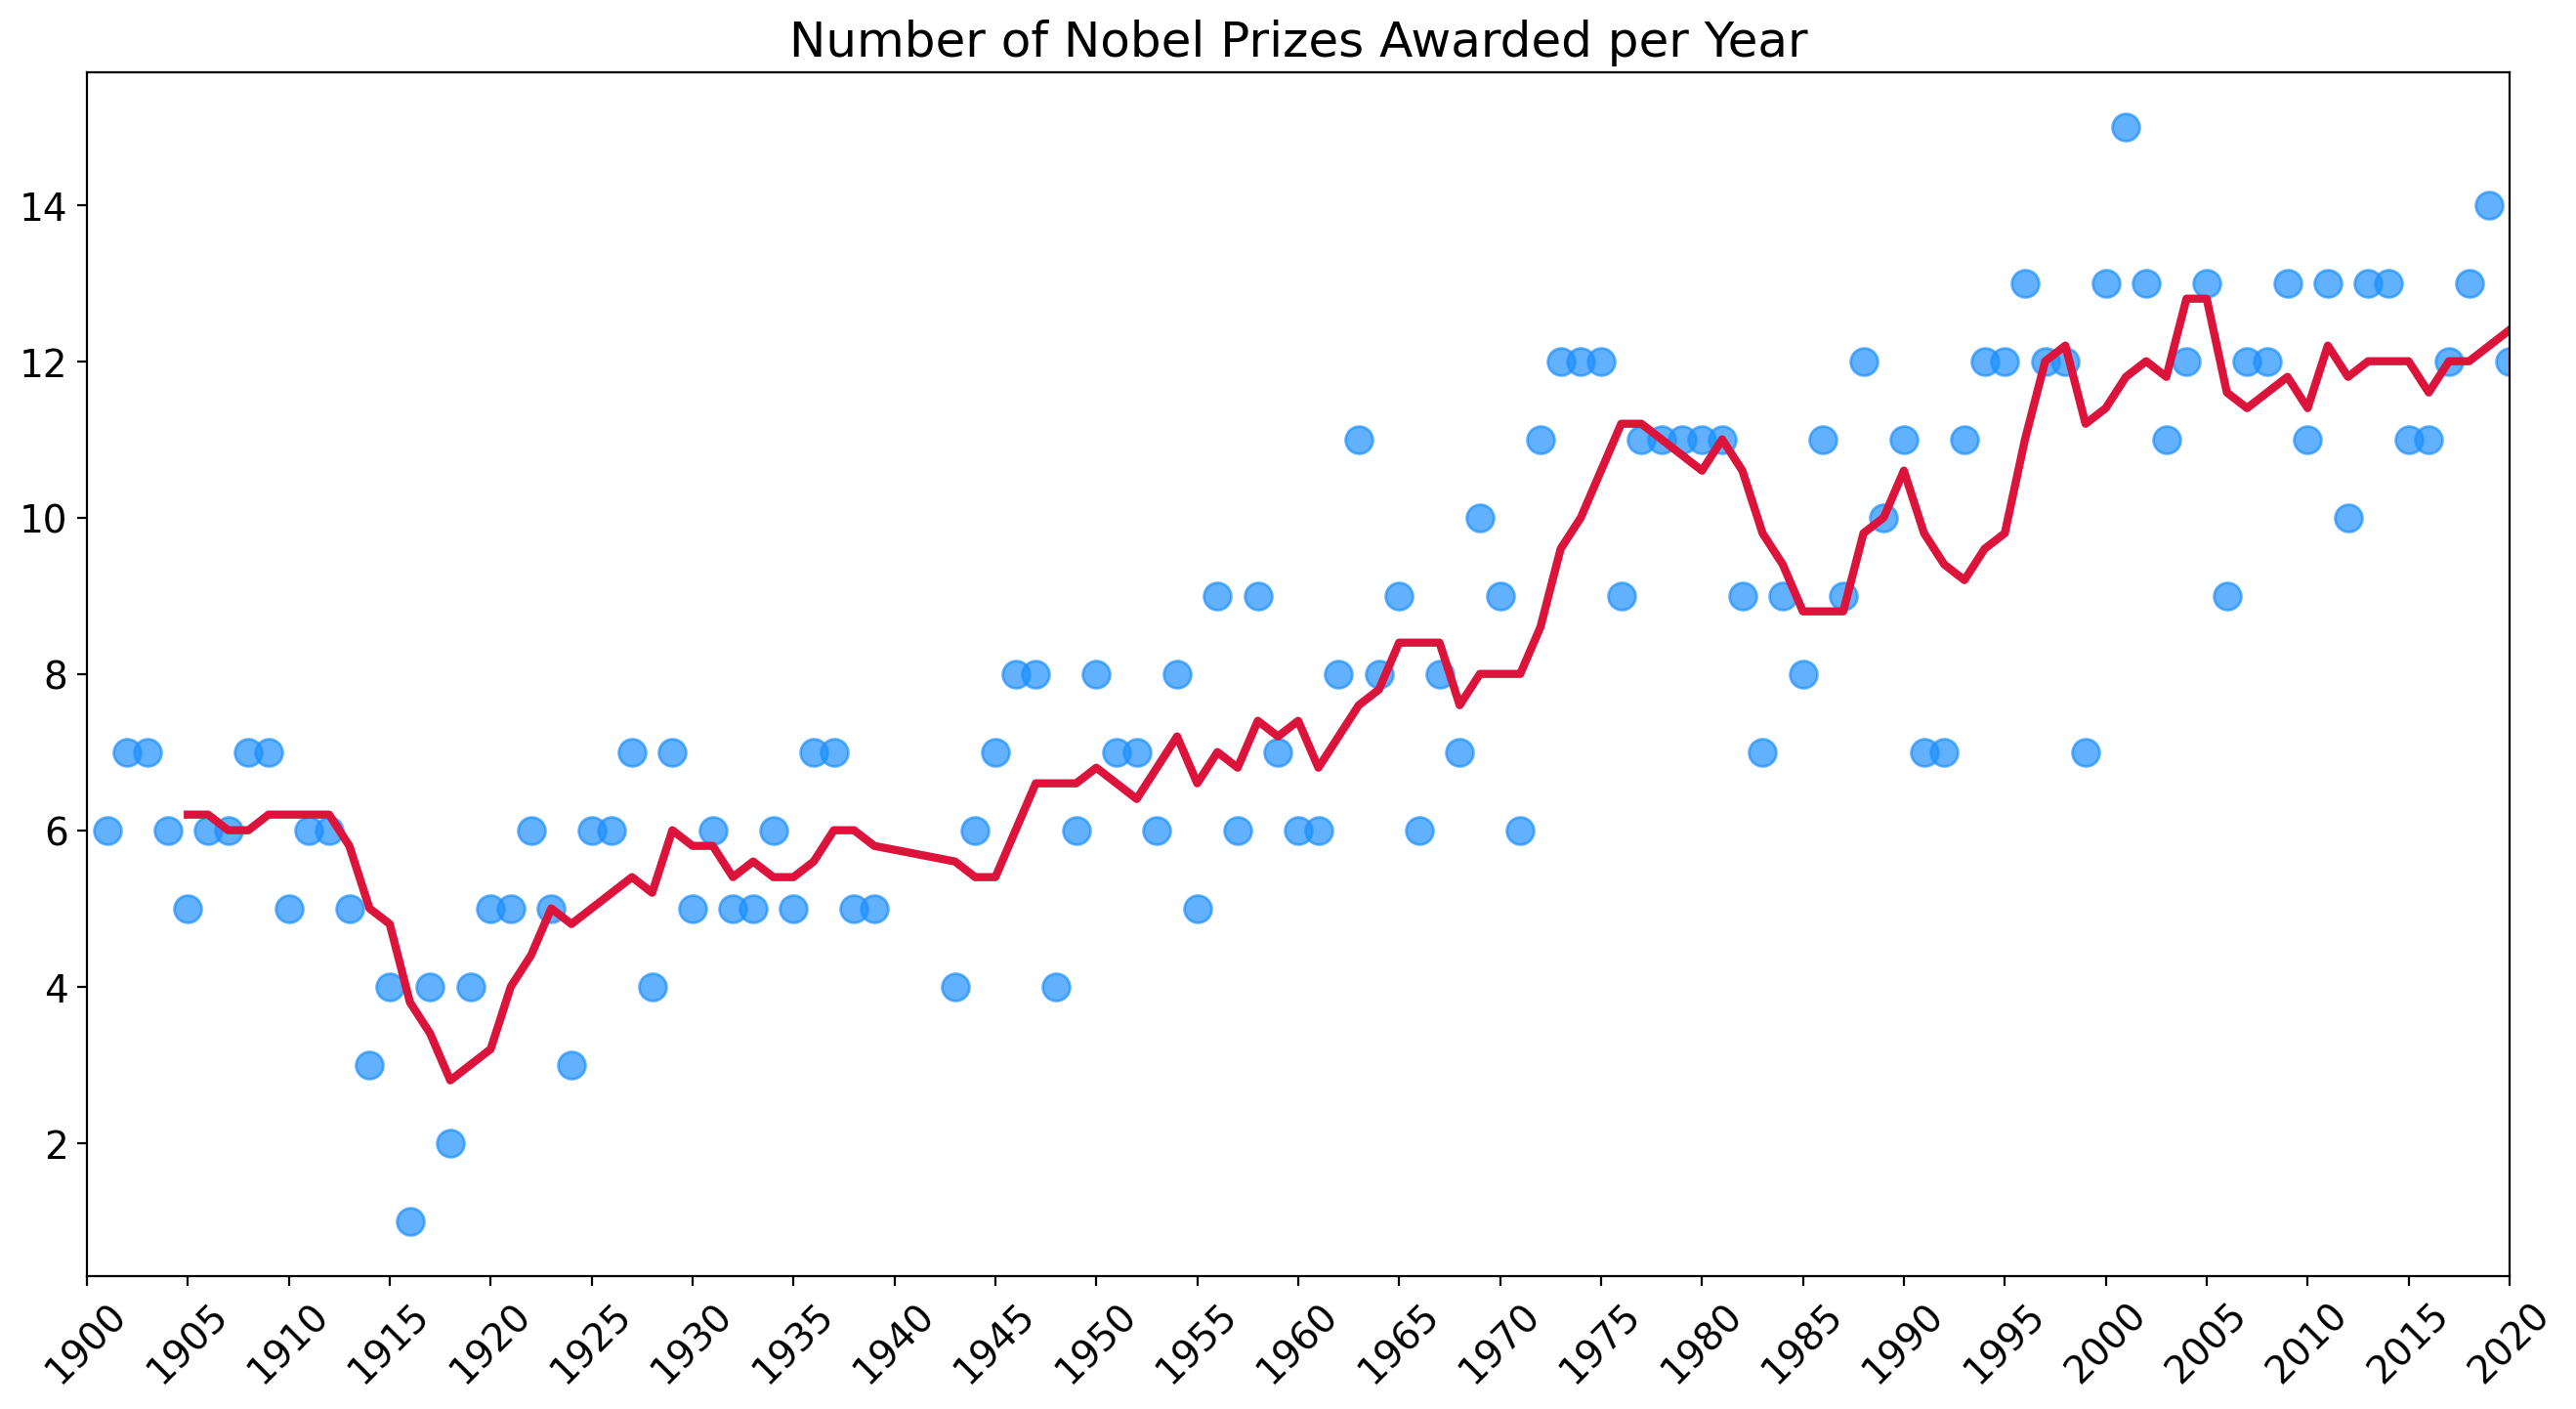

In [123]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Are More Prizes Shared Than Before?

Investigating if more prizes are shared than before

### Checking prize share totals

In [124]:
df_data['prize_share'].value_counts()

1/1    352
1/2    321
1/3    219
1/4     70
Name: prize_share, dtype: int64

### 5 year rolling average for average prize share

In [125]:
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()
share_moving_average

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.82
...,...
2016,0.52
2017,0.50
2018,0.50


### Scatterplot

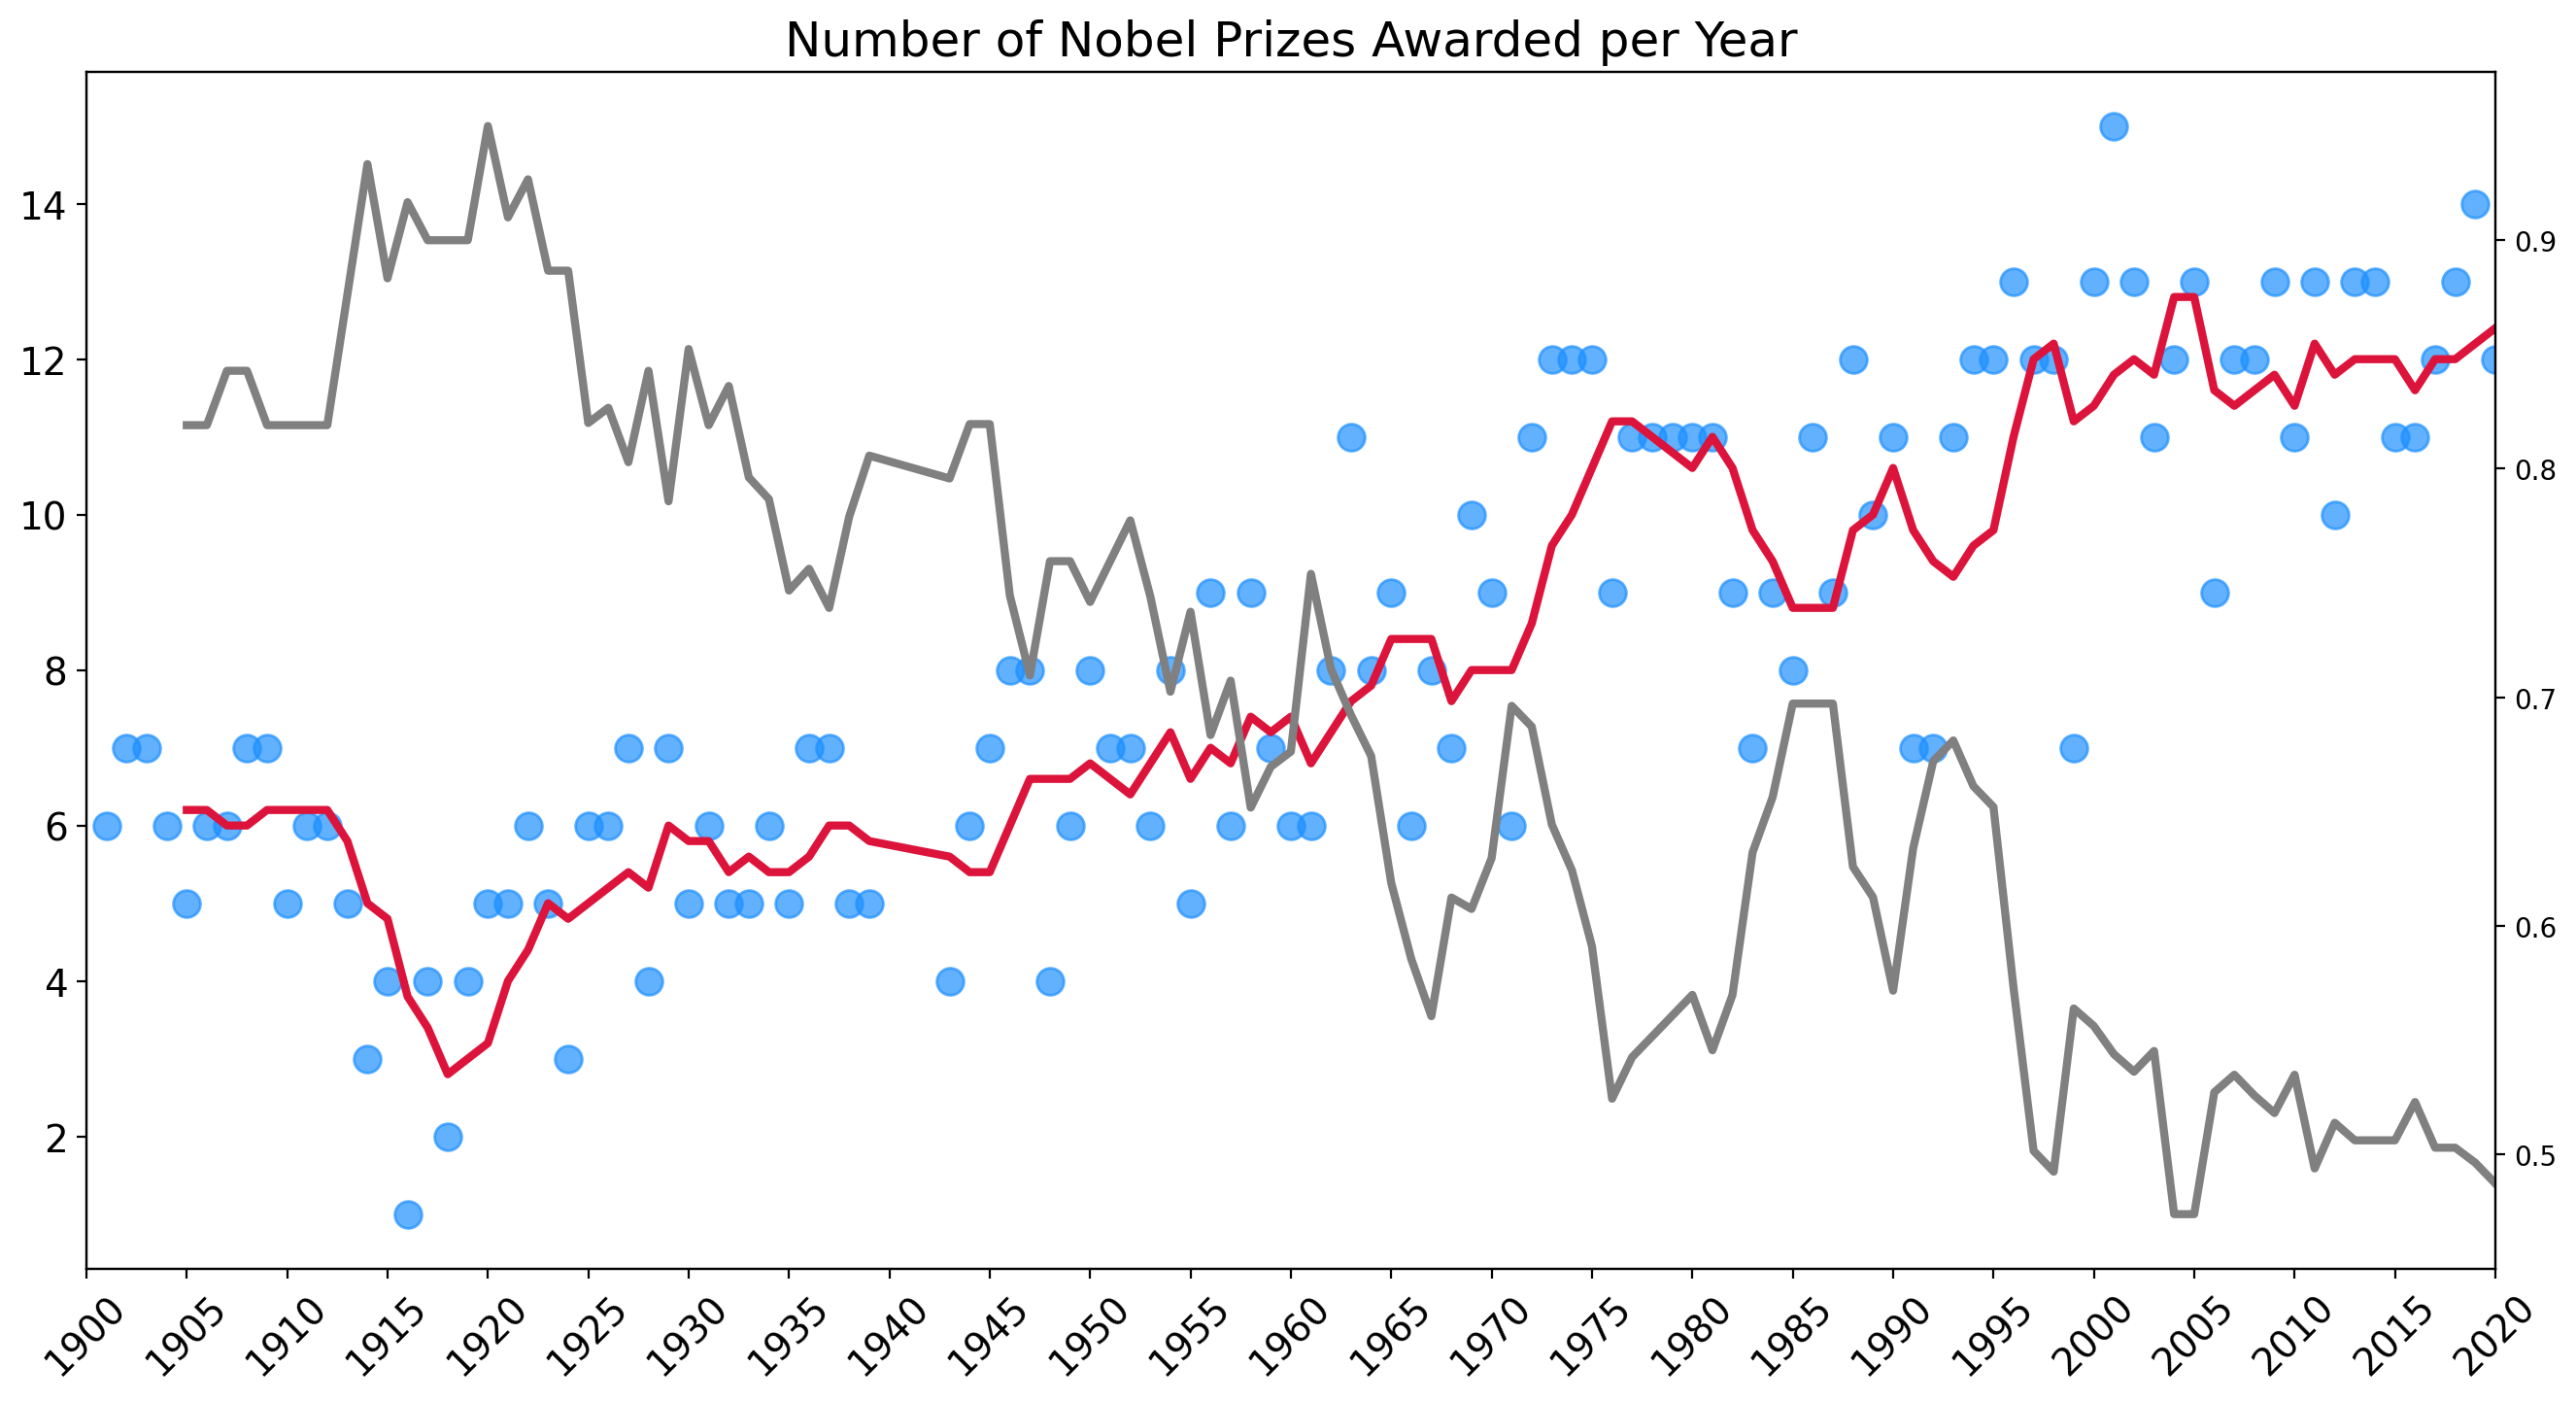

In [126]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

### Another Scatterplot

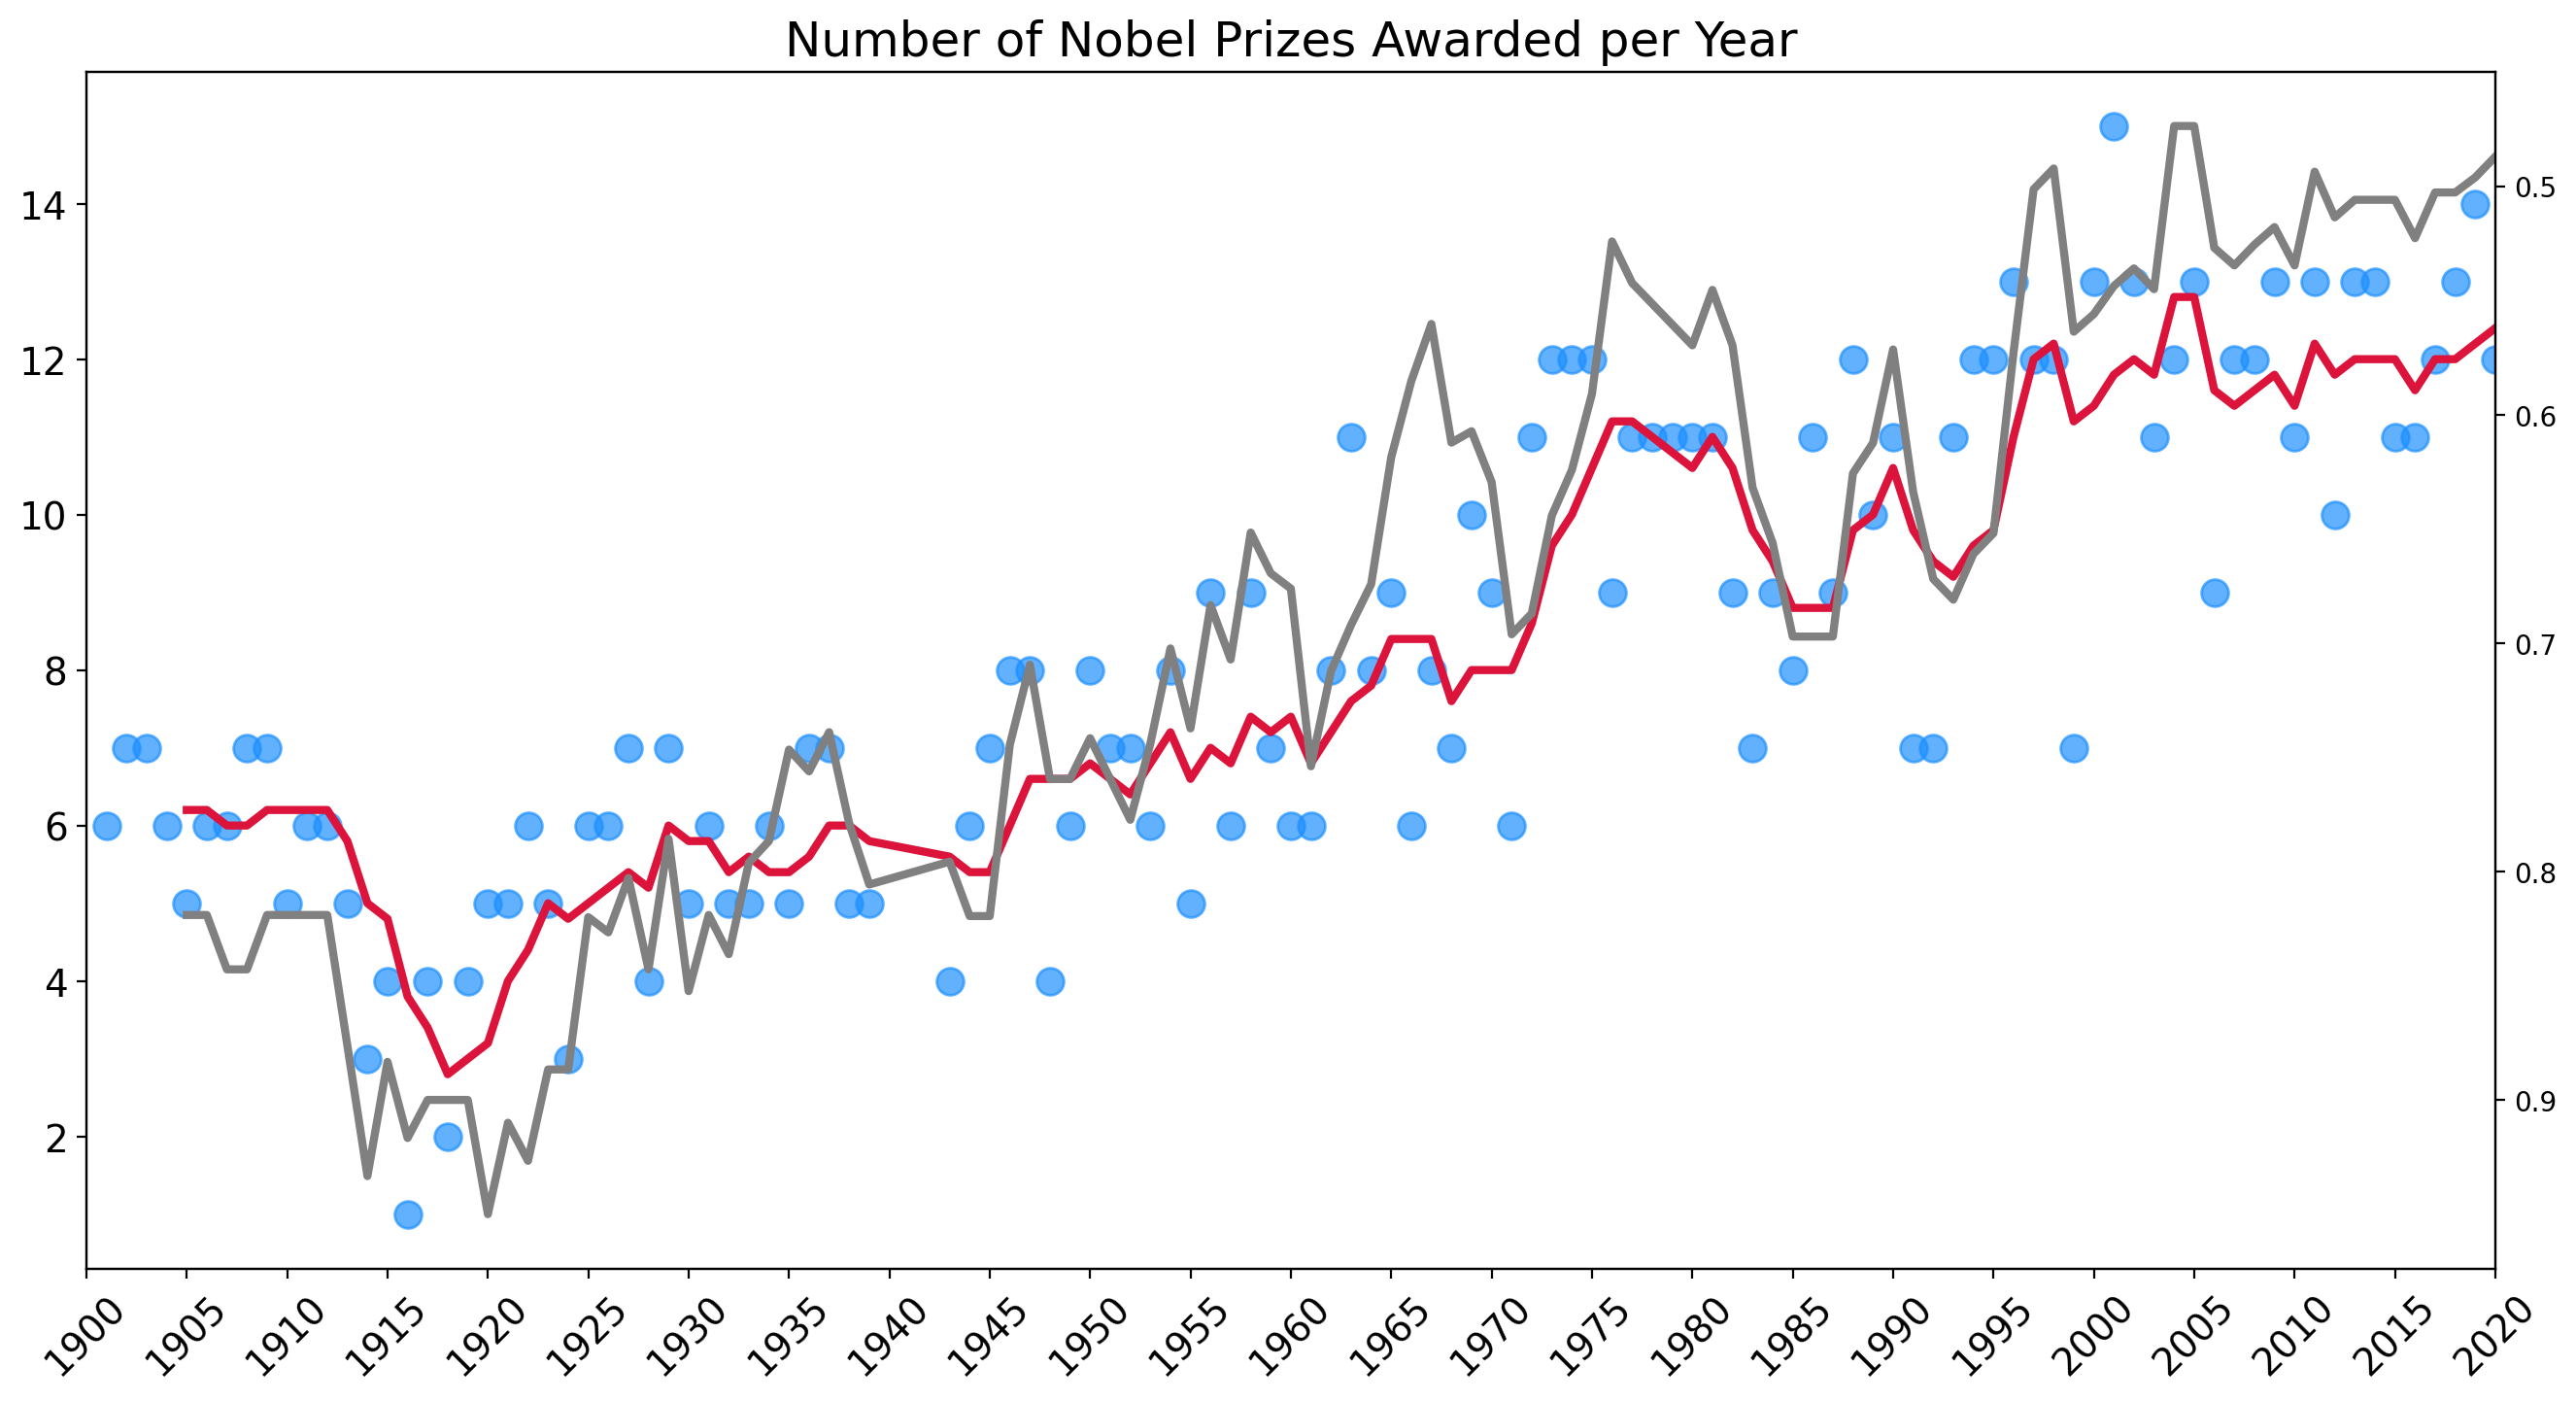

In [127]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
# Can invert axis
ax2.invert_yaxis()
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

# The Countries with the Most Nobel Prizes

* Creating a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column contains the total number of prizes won
* Plotly horizontal bar chart showing the number of prizes won by each country
* What is the ranking for the top 20 countries in terms of the number of prizes?

### New dataframe for top 20 countries by prizes

In [128]:
top_countries = df_data.groupby(by='birth_country_current', as_index=False).agg({'prize': pd.Series.count})
top_countries

,birth_country_current,prize
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1
...,...,...
74,United States of America,281
75,Venezuela,1
76,Vietnam,1
77,Yemen,1


### Sorting new dataframe

In [129]:
top_countries.sort_values('prize', inplace=True)
top20_countries = top_countries[-20:]
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


### Horizontal Bar Chart

In [130]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Choropleth Map to Show the Number of Prizes Won by Country



In [131]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [132]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter,
                         title='Choropleth Map of Nobel Prizes Won by Country')
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

Dividing up the plotly bar chart to show which categories made up the total number of prizes


### Data setup

In [133]:
cat_country = df_data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [134]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


### Plotly Bar Chart

In [135]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Determining the cumulative number of prizes won by each country in every year
* Plotly line chart 

In [136]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [137]:
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


### Line Chart

In [159]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes',
                     title='Cumulative Nobel Prizes Earned By Country')
 
l_chart.show()

# What are the Top Research Organisations?

Creating a bar chart showing the organisations affiliated with the Nobel laureates


### Data setup

In [139]:
prize_by_org_name = df_data.groupby(by=['organization_name'], as_index=False).count()
prize_by_org_name = prize_by_org_name.sort_values('prize')[['organization_name', 'prize']]
top20_org = prize_by_org_name[-20:]
top20_org

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


### Plotly Bar Chart

In [140]:
prize_by_org_bar = px.bar(x=top20_org.prize,
                       y=top20_org.organization_name,
                       color=top20_org.prize,
                       color_continuous_scale='Viridis',
                       title='Top 20 Organizations by Number of Prizes')
 
prize_by_org_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Organization',
                            coloraxis_showscale=False)
prize_by_org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

* Creating another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [141]:
prize_by_org_city = df_data.groupby(by=['organization_city'], as_index=False).count()
prize_by_org_city = prize_by_org_city.sort_values('prize')[['organization_city', 'prize']]
top20_org_city = prize_by_org_city[-20:]
top20_org_city

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


### Plotly Bar Chart

In [142]:
prize_by_org_city_bar = px.bar(x=top20_org_city.prize,
                       y=top20_org_city.organization_city,
                       color=top20_org_city.prize,
                       color_continuous_scale='Viridis',
                       title='Top 20 Cities by Number of Prizes')
 
prize_by_org_city_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='City',
                            coloraxis_showscale=False)
prize_by_org_city_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 


* Creating a plotly bar chart graphing the top 20 birth cities of Nobel laureates
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?

### Data setup

In [143]:
prize_by_birth_city = df_data.groupby(by=['birth_city'], as_index=False).count()
prize_by_birth_city = prize_by_birth_city.sort_values('prize')[['birth_city', 'prize']]
top20_birth_city = prize_by_birth_city[-20:]
top20_birth_city

,birth_city,prize
343,"Milwaukee, WI",3
87,Cairo,4
356,Montreal,4
428,"Pittsburgh, PA",4
167,Frankfurt-on-the-Main,5
440,Prague,5
515,Stockholm,6
210,Hamburg,6
363,Munich,7
358,Moscow,7


### Plotly Bar Chart

In [144]:
prize_by_birth_city_bar = px.bar(x=top20_birth_city.prize,
                       y=top20_birth_city.birth_city,
                       color=top20_birth_city.prize,
                       color_continuous_scale='Plasma',
                       title='Top 20 Birth Cities by Number of Prizes')
 
prize_by_birth_city_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='City',
                            coloraxis_showscale=False)
prize_by_birth_city_bar.show()

### What percentage of US prizes came from NY?

In [171]:
f"{round((top20_birth_city['prize'].max()/df_countries['prize'].max())*100, 2)} percent"

'18.86 percent'

# Plotly Sunburst Chart: Combining Country, City, and Organisation


* Creating a DataFrame that groups the number of prizes by organisation. 
* Then using a Plotly sunburst chart

### Data setup

In [146]:
sunburst_df = df_data.groupby(by=['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
sunburst_df

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1
...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2
287,United States of America,"Wilmington, DE",Du Pont,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


### Plotly Sunburst Chart

In [147]:
sunburst_fig = px.sunburst(sunburst_df, 
                           path=['organization_country', 'organization_city', 'organization_name'], 
                           values='prize',
                          title='Where Do Discoveries Take Place?')

sunburst_fig.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

sunburst_fig.show()


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates when they won their prize?

### Adding "winning age" column

In [148]:
birth_years = df_data['birth_date'].dt.year
df_data['winning_age'] = df_data.year - birth_years
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33,71.00
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25,55.00
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25,68.00


### Who were the oldest and youngest winners?

* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Using Seaborn histogram to visualise the distribution of laureate age at the time of winning

### Finding the youngest Nobel laureate

In [149]:
df_data.sort_values('winning_age').head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Finding the oldest Nobel laureate

In [177]:
df_data.sort_values('winning_age').max()

C:\Users\armed\AppData\Local\Temp\ipykernel_17200\2003029157.py:1: FutureWarning:

The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



year                                                          2020
category                                                   Physics
prize            The Sveriges Riksbank Prize in Economic Scienc...
prize_share                                                    1/4
laureate_type                                         Organization
full_name                                            Élie Ducommun
birth_date                                     1997-07-12 00:00:00
share_pct                                                     1.00
winning_age                                                  97.00
dtype: object

### Average age of Nobel laureate

In [178]:
round(df_data['winning_age'].mean(), 2)

59.95

### More in depth look at dataset

In [152]:
df_data.describe()

,year,share_pct,winning_age
count,962.00,962.00,934.00
mean,"1,971.82",0.63,59.95
std,33.81,0.29,12.62
min,"1,901.00",0.25,17.00
25%,"1,948.00",0.33,51.00
50%,"1,977.00",0.50,60.00
75%,"2,001.00",1.00,69.00
max,"2,020.00",1.00,97.00


### Seaborn Histogram

<Axes: xlabel='year', ylabel='winning_age'>

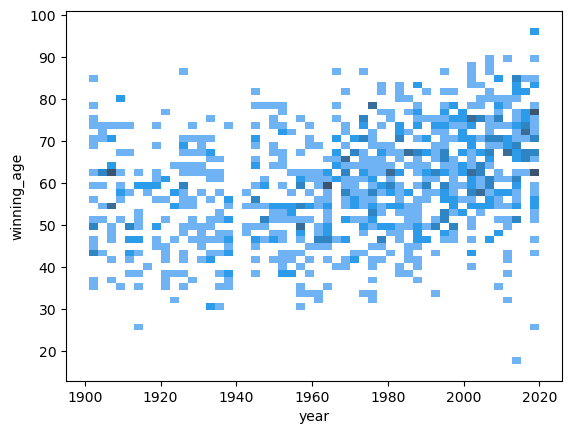

In [153]:
age_plot = sns.histplot(df_data,
                       x=df_data['year'],
                       y=df_data['winning_age'],
                        bins=50,)

age_plot

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculating the descriptive statistics for the age at the time of the award. 
* Then visualizing the distribution with a Seaborn histogram  

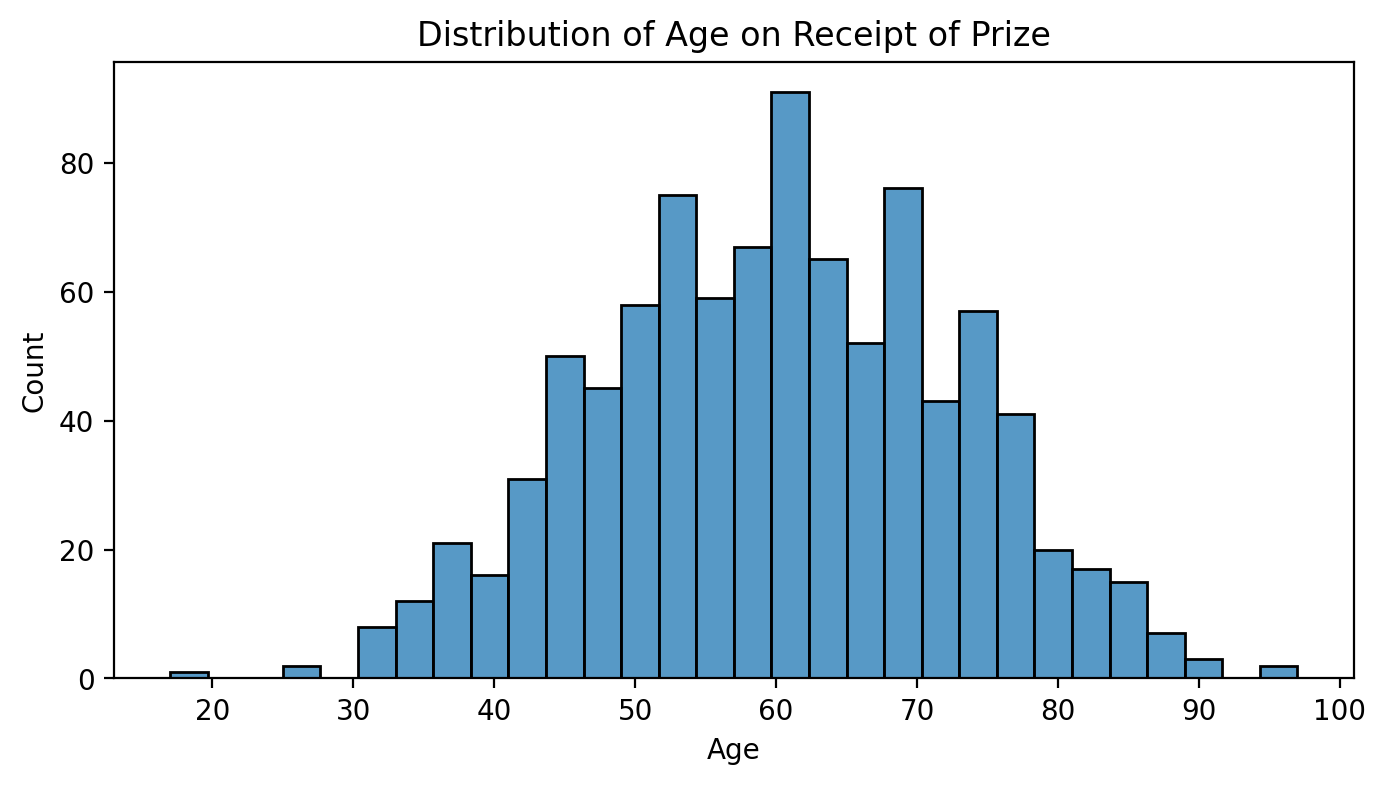

In [154]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

<Axes: xlabel='year', ylabel='winning_age'>

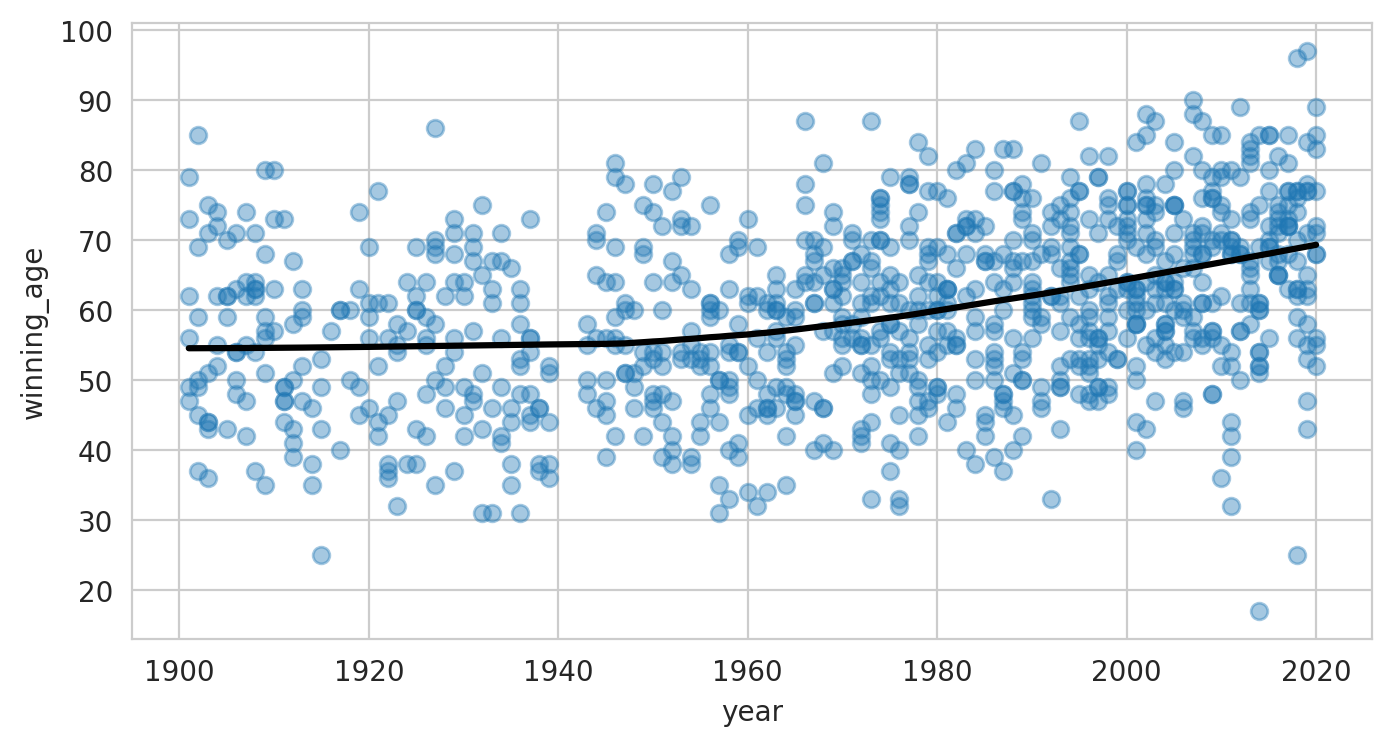

In [155]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    age_regplot = sns.regplot(df_data,
                             x='year',
                             y='winning_age',
                              lowess=True,
                             scatter_kws = {'alpha': 0.4},
                            line_kws={'color': 'black'})

age_regplot

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

<Axes: xlabel='category', ylabel='winning_age'>

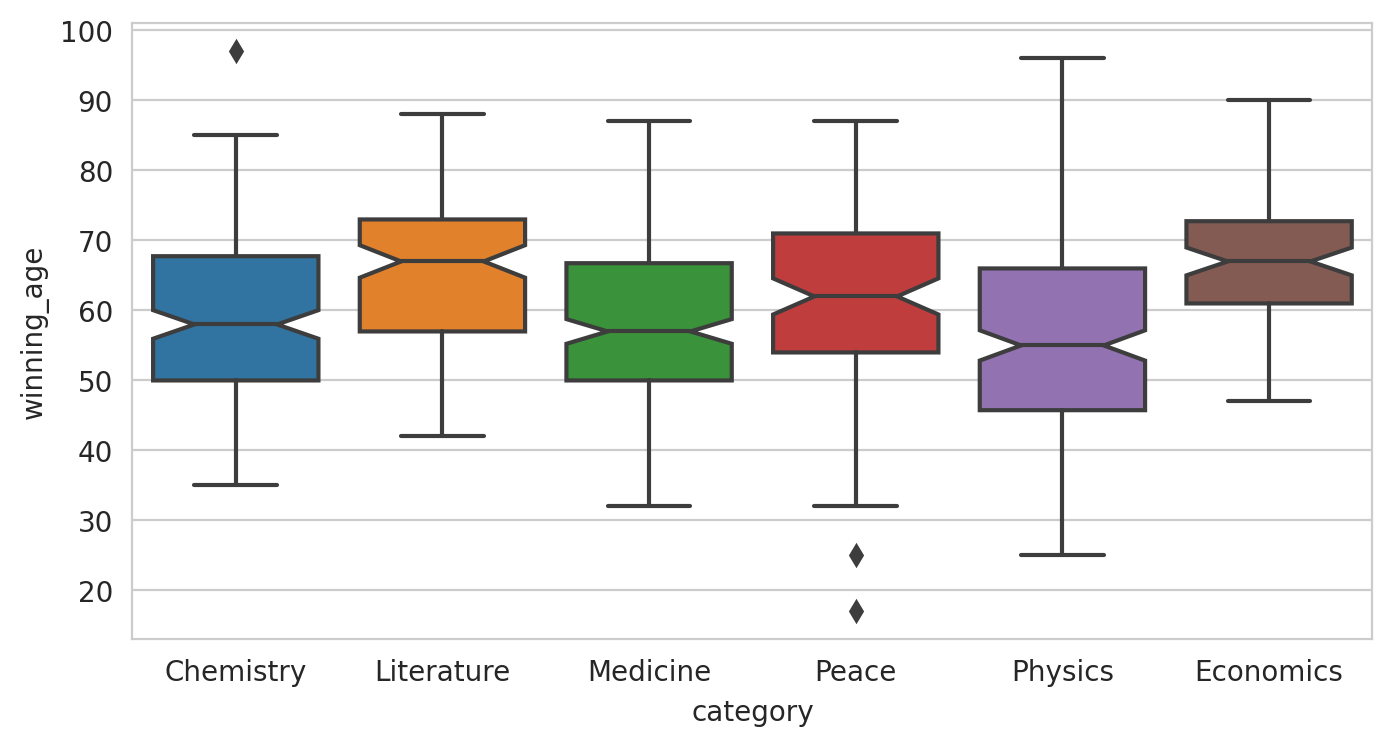

In [156]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    age_boxplot = sns.boxplot(df_data,
                             x='category',
                             y='winning_age',
                             notch=True)

age_boxplot

### Seaborn lmplot to show winning age per category across 6 charts

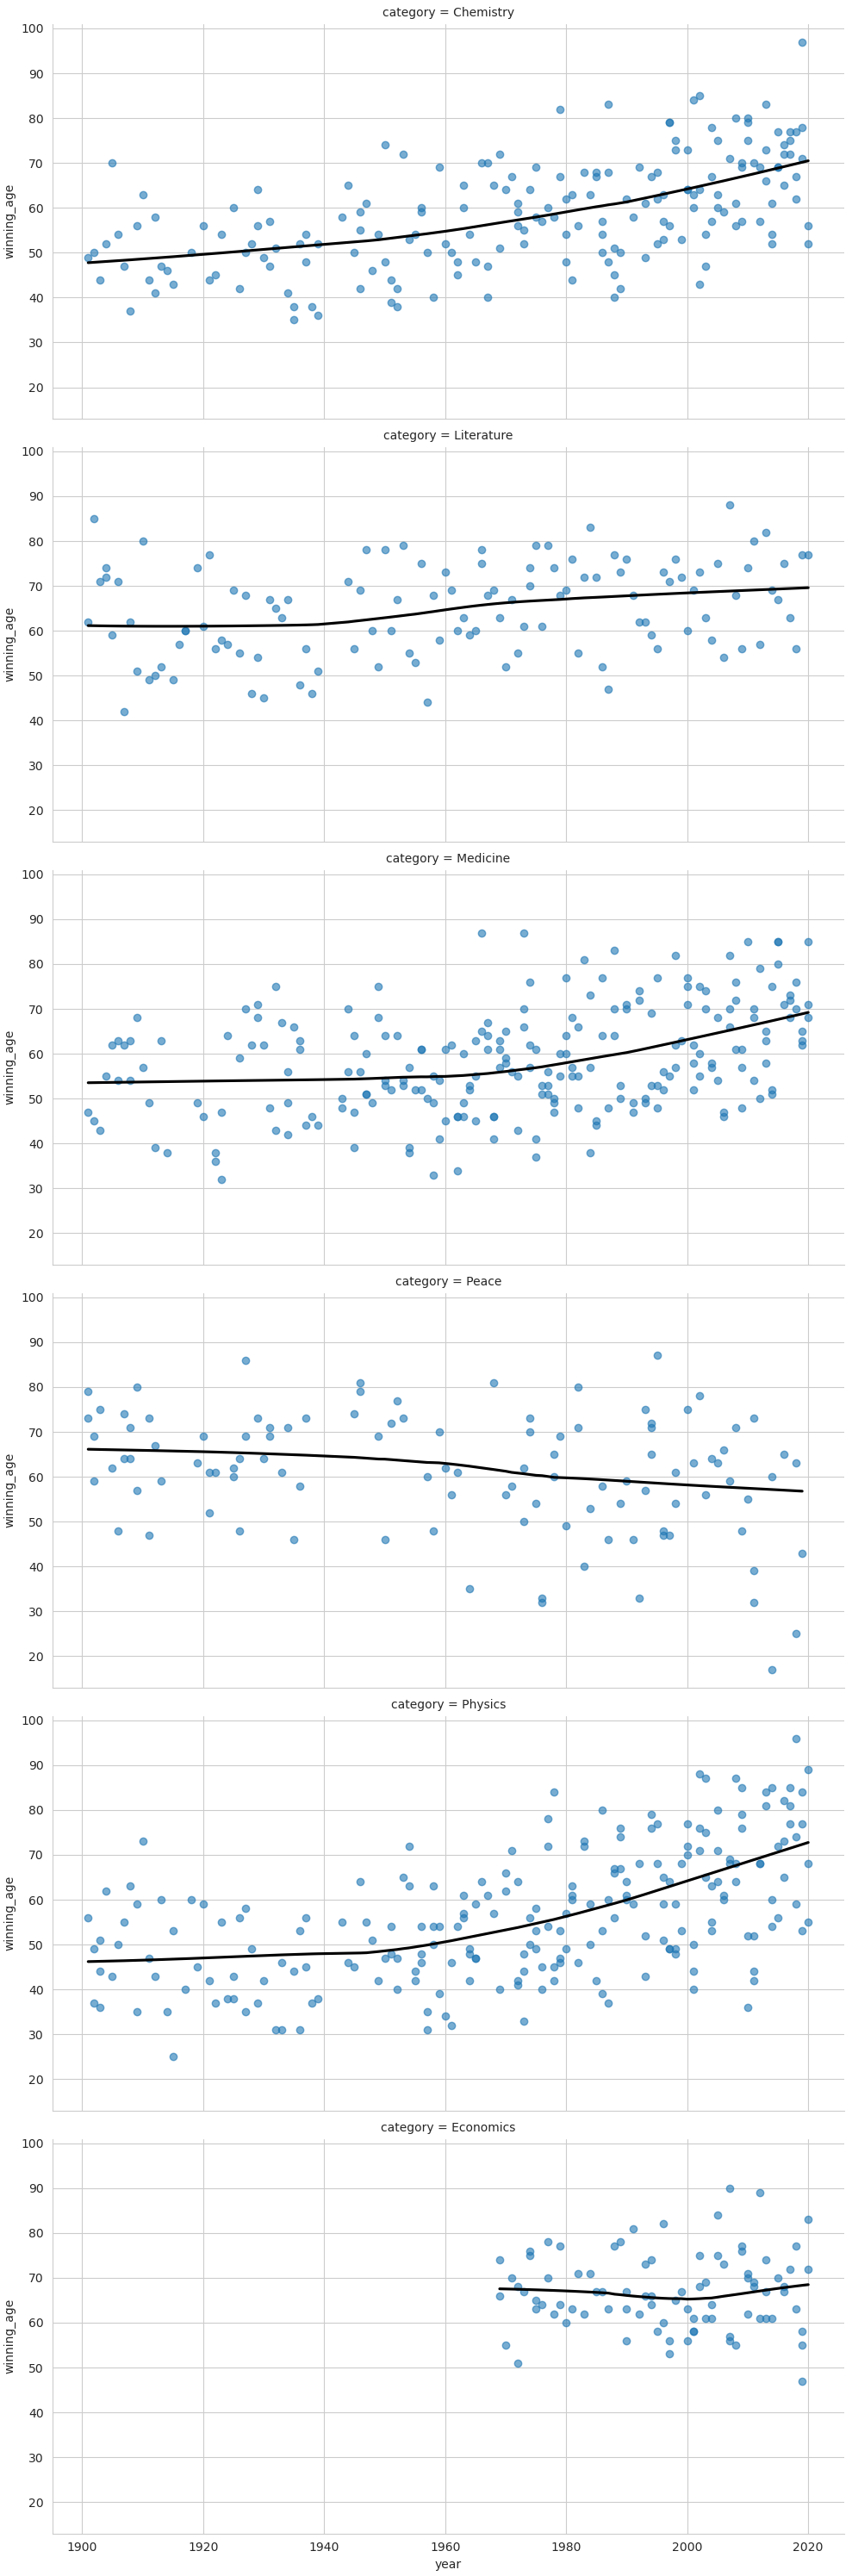

In [157]:
with sns.axes_style('whitegrid'):
    age_lmplot = sns.lmplot(df_data,
                            x='year',
                            y='winning_age',
                           row='category',
                           lowess=True,
                            aspect=2,
                           scatter_kws = {'alpha': 0.6},
                           line_kws = {'color': 'black'})

age_lmplot

### Seaborn lmplot to show winning age per category across a single chart

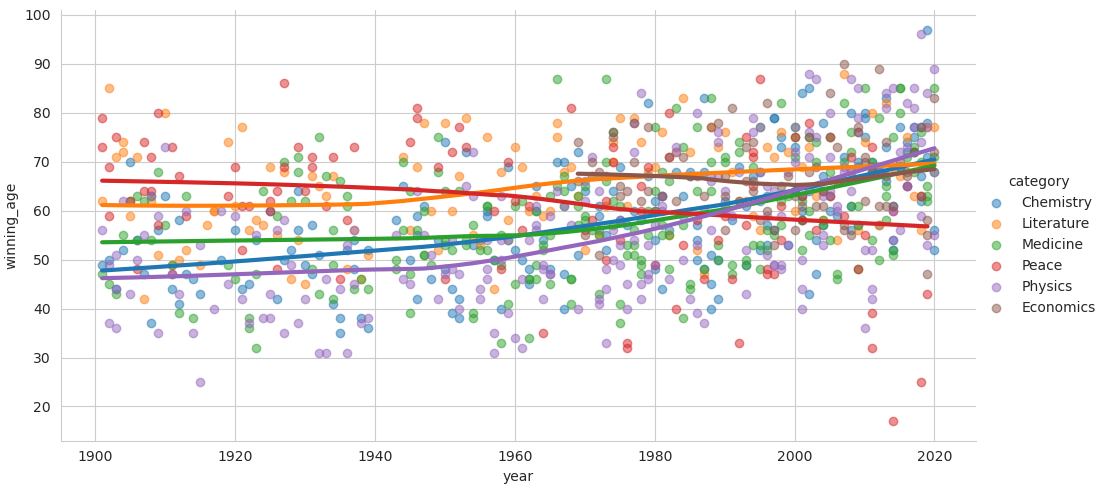

In [158]:
with sns.axes_style("whitegrid"):
    combined_plot = sns.lmplot(df_data,
                            x='year',
                            y='winning_age',
                           hue='category',
                           lowess=True,
                            aspect=2,
                           scatter_kws={'alpha': 0.5},
                           line_kws={'linewidth': 3})

combined_plot